In [ ]:
# let's use sklearn to try predict number of errors when numerical categories are featuers
# let's test linear regression, mlp and random forest

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import shap

# load data
# news.2013.en.trainlen.200.evaluation.100000.merged
data = pd.read_csv('news.2013.en.trainlen.200.evaluation.100000.merged.csv')
features = ['bigram_js_divergence', 'depth_of_parse_tree',
       'gpt2_perplexity', 'gpt2_tokens_per_char', 'named_entities',
       'pos_bigram_js_divergence', 'pos_js_divergence',
       'unigram_js_divergence']
analyzed_col = 'en_noisevignere3_3000_error_count'
# split data
X = data.drop(analyzed_col, axis=1)
y = data[analyzed_col]
# drop from x all things not in features
X = X[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear regression: 71.04255956691284
mean guess: 77.28890577999998


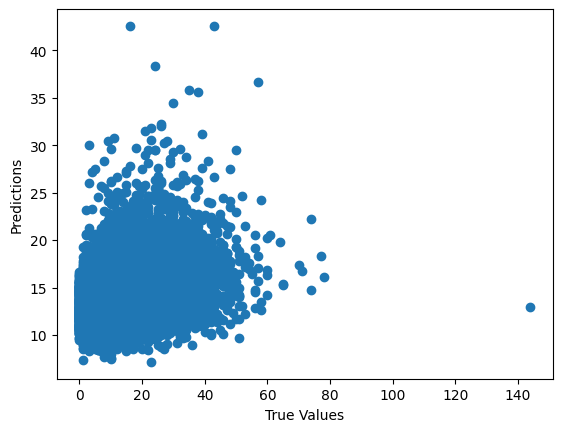

In [5]:

# linear regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
linear = LinearRegression()
linear.fit(X_train_poly, y_train)
y_pred = linear.predict(X_test_poly)
print('linear regression:', mean_squared_error(y_test, y_pred))

# what is the MSE when we'd always guess the mean
mean_guess = [y_train.mean()]*len(y_test)
print('mean guess:', mean_squared_error(y_test, mean_guess))

# visualize
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# lr_explainer = shap.LinearExplainer(linear, X_train)
# shap_values = lr_explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")



In [8]:

# mlp
mlp = MLPRegressor(hidden_layer_sizes=(500, 500), max_iter=5)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('mlp:', mean_squared_error(y_test, y_pred))

# mlp_explainer = shap.KernelExplainer(mlp.predict, X_train)
# shap_values = mlp_explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")


mlp: 75.87480391483739


/home/provaja/enigma-transformed/enigmavenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


random forest: 71.724457125
mean guess: 77.28890577999998


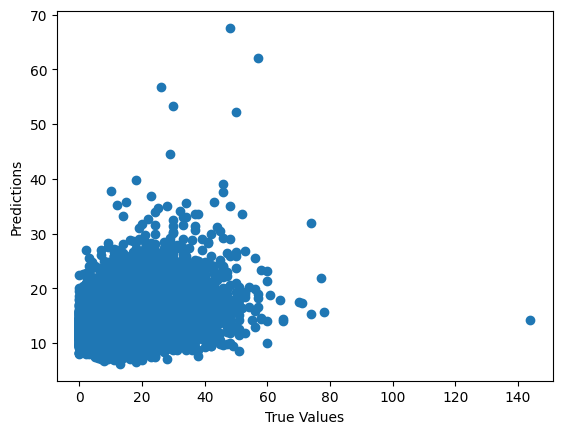

In [4]:

# random forest
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('random forest:', mean_squared_error(y_test, y_pred))

mean_guess = [y_train.mean()]*len(y_test)
print('mean guess:', mean_squared_error(y_test, mean_guess))

# visualize
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

treeexplainer = shap.TreeExplainer(forest)
shap_values = treeexplainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")